In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#so last three column have many mssing value so we are going to drop it 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
130,ham,I'm home.
90,ham,Yeah do! DonÛ÷t stand to close tho- youÛ÷ll ...
1438,ham,"Arms fine, how's Cardiff and uni?"
2626,ham,Unni thank you dear for the recharge..Rakhesh
947,ham,Hey i booked the kb on sat already... what oth...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
encoder.fit_transform(df['Target'])
#so now we can see 0 is assigned to ham and 1 is assigned to spam

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking for missing values 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
#checking for duplicated values 
df.duplicated().sum()

403

In [14]:
#removing duplicated values 
df=df.drop_duplicates(keep='first')
#there are two parameters in this duplicates first means hold the first occurenece of data and last is used for the last occurence of that data
df.duplicated().sum()

0

In [15]:
df.shape 

(5169, 2)

# EDA (Exploratory Data Analysis)

In [16]:
df['Target'].value_counts()
#so ham is much more than spam in this 

Target
0    4516
1     653
Name: count, dtype: int64

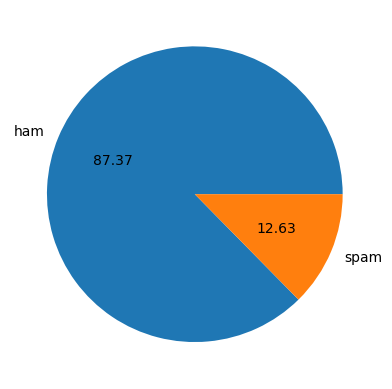

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
#data is imbalance 

In [19]:
import nltk

In [20]:
nltk.download("punkt")
#ignore this , this line has to eb runned first to use nltk library 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [22]:
df['Text'].apply(len)
#so this the length of text tht each line carries

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [23]:
df['num_characters']=df['Text'].apply(len)
df.head()
#so now there si new column which will have the length of characters in text message 

C:\Users\Naveen\AppData\Local\Temp\ipykernel_2812\859130027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#numbers of words 
df['Text'].apply(lambda x:nltk.word_tokenize(x))
# characters are converted into words now 


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [25]:
#counting the number of words 
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()
#just added len to above code 

C:\Users\Naveen\AppData\Local\Temp\ipykernel_2812\3836729317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#numbers of sentences
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [27]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()
#just used sent instead of words in nltk library

C:\Users\Naveen\AppData\Local\Temp\ipykernel_2812\351888351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#we are going to analyis the analzye the data on bases of ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#we are going to analyis the analzye the data on bases of spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import  seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

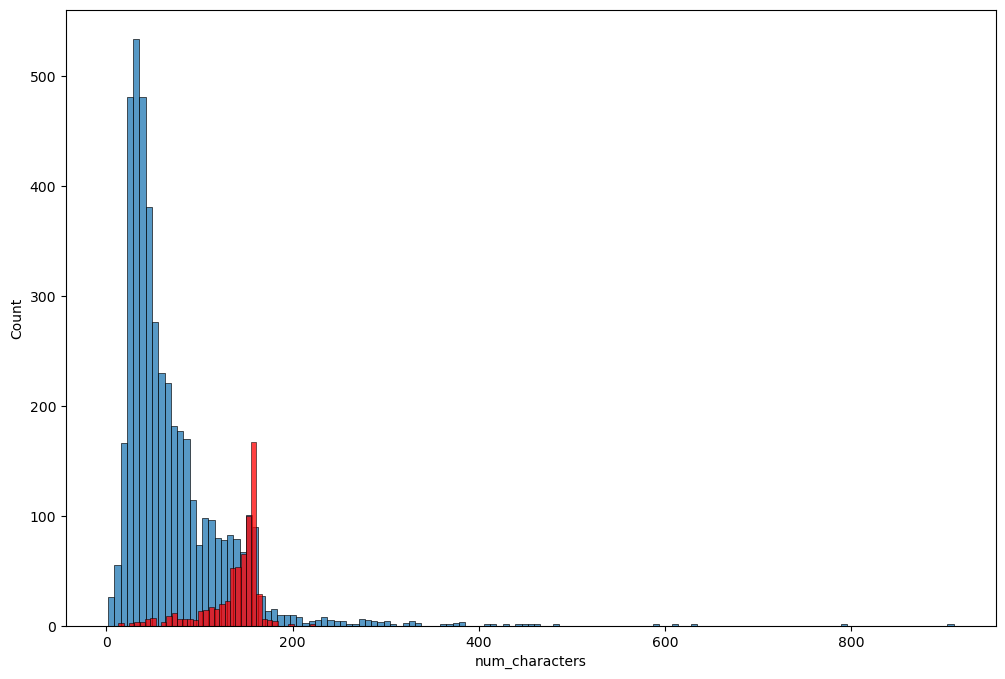

In [32]:
plt.figure(figsize=(12,8))
#defining figure size of the graph 
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='r')
# we can cleary see that ham message has less character the spam message 

<Axes: xlabel='num_words', ylabel='Count'>

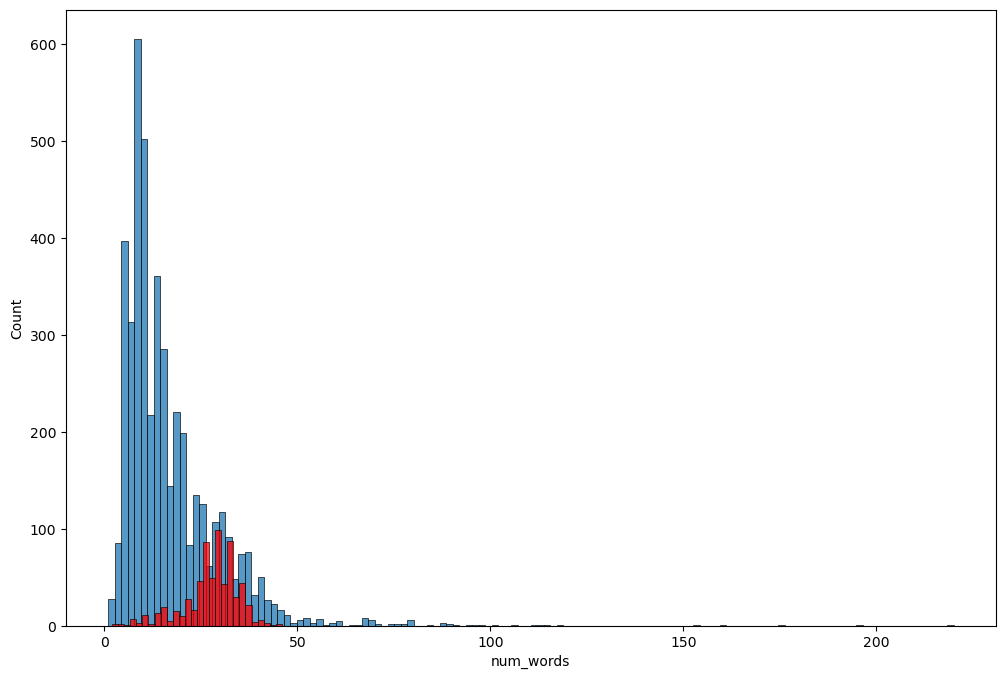

In [33]:
plt.figure(figsize=(12,8))
#defining figure size of the graph 
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='r')
# we can cleary see that ham message has less words than spam messages 

C:\Users\Naveen\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


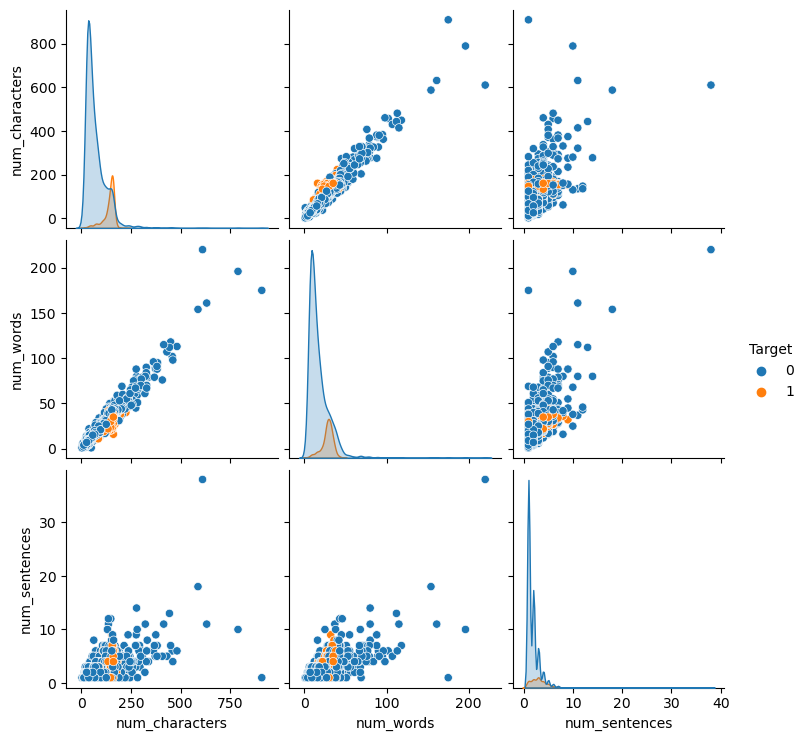

In [34]:
sns.pairplot(df,hue='Target')
#now we are able to see the relations between columns 
#by seeing graphs we can say that there are many outliers 

<Axes: >

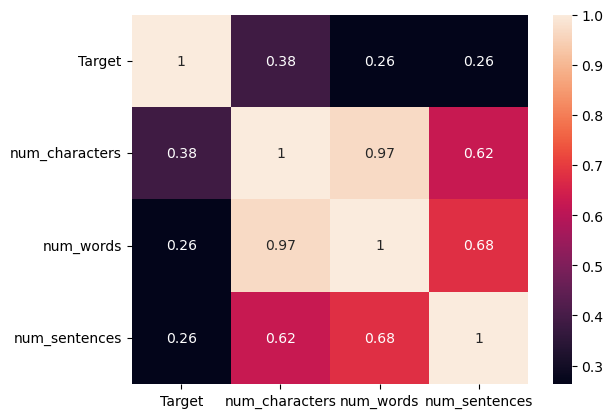

In [35]:
#let find correlation between them 
df_numeric = df.drop(columns=['Text'])
#we have to drop this column because  of textual dtype 
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True)

In [36]:
# In heat map 1 means high correlation, this means that number closer to 1 then those two columns have high multicolinearity between them
#as we can see that all three columns have high correlation between them so we have to take one column only 
#And that will be num_characters beacuse with target it have high correlation (you can see in the graph , top most line )

# Data Preprocessing

In [37]:
# mainly we do five things in it:
#1.lowercase
#2.Tokenization
#3.Removing special character
#4.Removing stop words and punctuation
#5.stemming

In [38]:
#what are stop words 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation
#these are punctuations 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
#used for stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [41]:
#making a function to solve these problems
def transform_text(text):
    #this is for lower case 
    text=text.lower()
    #this is for tokenization
    text=nltk.word_tokenize(text)
    
    #this is for removing special characters 
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #this is for stopwords and punctuations
    
    text=y[:] # doing cloning of list in text again 
    y.clear()#now y is empty 
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
     
    #for stemming
    text=y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
transform_text("I loved the lectures in college,How about you?")
#now you can test here by giving diffrents sentences 

'love lectur colleg'

In [43]:
#lets test this on dataset textual data 
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
#see this is working 

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [45]:
#just making one more column for the transformed_text
df['transformed_text']=df['Text'].apply(transform_text)
df.head()

C:\Users\Naveen\AppData\Local\Temp\ipykernel_2812\1918935566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Text'].apply(transform_text)


,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
#Now we going to use word cloud beacuse it gives us the big pictures of text data which repeats in the sms 
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))


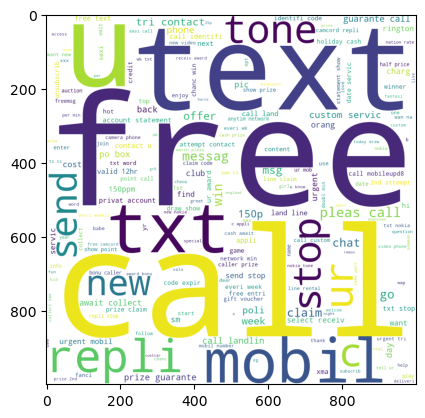

In [48]:
plt.imshow(spam_wc)
#we can see that these are words that repeats in spam sms 

In [49]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
#these are the words which are in ham sms or in noraml emails 

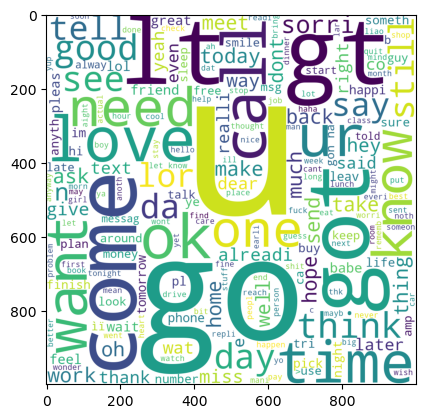

In [50]:
plt.imshow(ham_wc)

In [51]:
#now we want ki  50 words jo sbase jaida use hue h spams sms mein
df[df['Target']==1]

,Target,Text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [52]:
df[df['Target']==1]['transformed_text'].tolist()
#  tolist is used to make all the words in a single list for easy access 

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [53]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
#now no. of occurenece of words 
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [56]:
Counter(spam_corpus).most_common(30)
# most common words used in sms 

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [57]:
#adding this in a dataframe 
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


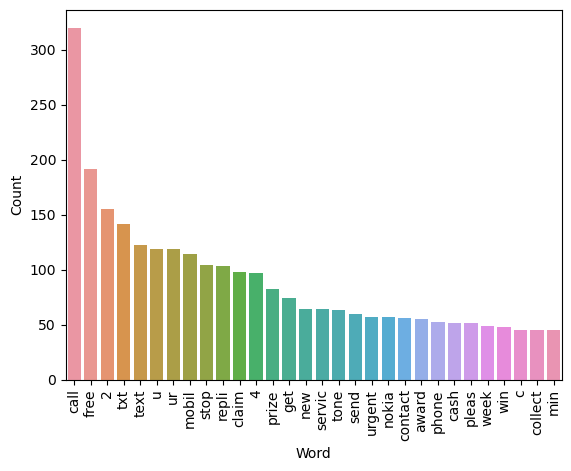

In [58]:
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame and extract the top 30 words
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically for better readability
plt.show()

In [59]:
#for ham
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

In [61]:
#now no. of occurenece of words 
from collections import Counter
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [62]:
#adding this in a dataframe 
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


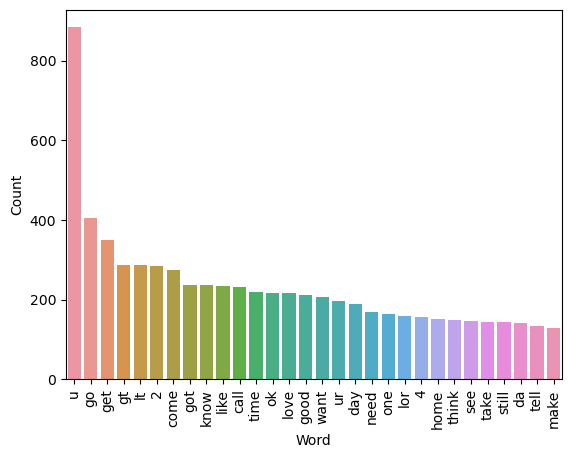

In [63]:
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame and extract the top 30 words
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically for better readability
plt.show()

# Model Building 

In [114]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [115]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [116]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [117]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [118]:
#x=np.hstack((x,df['num_characters'].values.reshape(-1,1))
# this is used to append an 2d array in x as a new column so that the accuracy of the algorithm can improve but after doing this we got to know that accuracy decreases so we drop this idea 

In [119]:
x.shape
# 5169 sms,6708 words

(5169, 6708)

In [120]:
y=df['Target'].values

In [121]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [123]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#yaha precision isliye liya kyuki ye high precision model h emails and sms wale m precision calculate karte h jaida trr 

In [124]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [125]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [126]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#Here accuracy is comming good but , as it is imbalance dataset h so precision matter more then accuracy 

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [127]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# so here we are getting a good precision score 

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [78]:
#now we going to do this with tfidf 

In [128]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [129]:
Y=df['Target'].values

In [131]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [133]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [134]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))
# so here we get the 100 percent percision score which means zero false positive if didn't understand then refer to comfusion matrix once 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [135]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [136]:
# so we go for mnb beacuse precision matter here more than accuaracy 
#tfidf---> mnb (we will take further)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [138]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [139]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
#major purpose of doing this is to comparing other algorithms to mnb 

In [140]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    
    return accuracy,precision 

In [141]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)
# This is an example


(0.9758220502901354, 0.9747899159663865)

In [142]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    
    print('for',name)
    print('current_accuracy: ',current_accuracy)
    print('current_precision: ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
current_accuracy:  0.9758220502901354
current_precision:  0.9747899159663865
for KN
current_accuracy:  0.9052224371373307
current_precision:  1.0
for MNB
current_accuracy:  0.9709864603481625
current_precision:  1.0
for DT
current_accuracy:  0.9274661508704062
current_precision:  0.8118811881188119
for LR
current_accuracy:  0.9584139264990329
current_precision:  0.9702970297029703
for RF
current_accuracy:  0.9758220502901354
current_precision:  0.9829059829059829


C:\Users\Naveen\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for AdaBoost
current_accuracy:  0.960348162475822
current_precision:  0.9292035398230089
for BgC
current_accuracy:  0.9584139264990329
current_precision:  0.8682170542635659
for ETC
current_accuracy:  0.9748549323017408
current_precision:  0.9745762711864406
for GBDT
current_accuracy:  0.9468085106382979
current_precision:  0.9191919191919192
for xgb
current_accuracy:  0.9671179883945842
current_precision:  0.9262295081967213


In [143]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Precision', ascending=False)

In [144]:
performance_df
#here we can see that mnb is the best algo , giving  the best accuracy with precision score 

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,MNB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [145]:
# ETC ( it is type random forest with more randomness of data sampling)

In [146]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
#performance_df is the DataFrame you want to melt.
#id_vars="Algorithm" specifies that the 'Algorithm' column should be kept as is (not melted).
#By default, the other columns (in this case, 'Accuracy' and 'Precision') will be melted into two new columns: 'variable' and 'value'.
#'variable' will contain the column names of the original DataFrame that were melted ('Accuracy' and 'Precision').
#'value' will contain the corresponding values from those columns.

In [147]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\Naveen\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


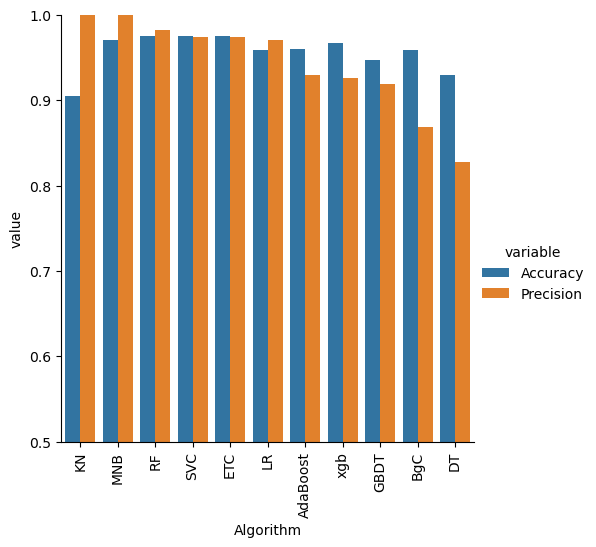

In [98]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()
#catplot is short for "categorical plot," and it is used to create categorical plots.

In [99]:
# model improve
# 1. Change the max_features parameter of TfIdf (max_feature=3000)
# already changed in previous code and you can see the result above 
# we have done this because before max_feature=3000, mnb have accuracy of 95 but after doing this accuracy improved to 97.

In [100]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
# 2.here we can apply scaling 0 to 1 , because there will be a chance that algo accuracy and precison will improve 
#from sklearn.preprocessing import  MinMaxScaler     (applying minmax scaler because standard scaler gives -ve values also which is not accpeted by naive bayes )
#scaler = MinMaxScaler()
# X=scaler.fit_transform(X)
#by applying this we will see that mnb accuracy is improved but precison decreases so that why we droped this idea 


# 3. appending of num_characters column in x may be increase the accuracy but after doing we got to know it doesn't 


In [102]:
# now we are using voting classifier ( to combine our best algo's ) so that we can improve accuracy 
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting="soft")

In [104]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
Y_pred3=voting.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))
#as we can see that accuracy  increased but precision decreases and precision is more important here so we can't take this forward

0.9816247582205029
0.9917355371900827


In [106]:
#now we are going to do stacking 
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
dlf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)
dlf.fit(X_train,Y_train)


StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [109]:
Y_pred4=dlf.predict(X_test)
print(accuracy_score(Y_test,Y_pred4))
print(precision_score(Y_test,Y_pred4))

0.9806576402321083
0.9538461538461539


In [110]:
# so as we can say by seeing this that nothing improves so we are going to drop this also 


In [148]:
# now making files for sms in which sms will process 
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
# go and see now you have created the files for ifidf and mnb model 

In [112]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
